In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
#Fields in the data
#Mouse ID	Drug Regimen	Sex	Age_months	Weight (g)

study_results.head()
#Fields in the data
#Mouse ID	Timepoint	Tumor Volume (mm3)	Metastatic Sites

# Combine the data into a single dataset; looking for mouse information from this study
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

#combined_data.head()

In [2]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [3]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_groups = combined_data.groupby(["Mouse ID","Timepoint"])
mice_counts = mice_groups.count()
mice_duplicates = mice_counts[(mice_counts["Age_months"] > 1)]
#mice_duplicates
#g989

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#Using loc
#g989

In [5]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(combined_data[combined_data["Mouse ID"] == 'g989'].index, inplace=True)
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
#len(combined_data["Mouse ID"].unique())
#249 mice - 1 duplicated mouse's records = 248 mice

In [7]:
#Summary Statistics section:

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties 
#of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_vol = combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol
tumor_groups = tumor_vol.groupby(["Drug Regimen"])
tumor_mean = tumor_groups.mean()
tumor_median = tumor_groups.median()
tumor_variance = tumor_groups.var()
tumor_sd = tumor_groups.std()
tumor_sem = tumor_groups.sem()
tumor_summary = pd.merge(tumor_mean, tumor_median, on="Drug Regimen", how="outer")
tumor_summary.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean (mm3)", "Tumor Volume (mm3)_y": "Tumor Volume Median (mm3)"}, inplace=True)

tumor_summary = pd.merge(tumor_summary, tumor_variance, on="Drug Regimen", how="outer")
tumor_summary.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"}, inplace=True)
tumor_summary = pd.merge(tumor_summary, tumor_sd, on="Drug Regimen", how="outer")
tumor_summary.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Deviation"}, inplace=True)
tumor_summary = pd.merge(tumor_summary, tumor_sem, on="Drug Regimen", how="outer")
tumor_summary.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Error"}, inplace=True)

tumor_summary

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_summary_agg = tumor_groups.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary_agg
# Using the aggregation method, produce the same summary statistics in a single line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
#Bar and Pie Chart section:

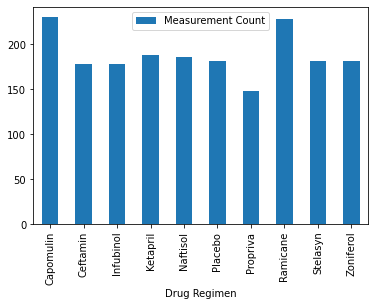

In [11]:
# Generate a bar plot showing the total number of measurements taken 
#on each drug regimen using pandas.
drug_counts = tumor_groups.count()
drug_counts.rename(columns={"Tumor Volume (mm3)":"Measurement Count"}, inplace=True)
drug_counts.reset_index(level=0, inplace=True)
drug_counts
drug_counts.plot.bar(x="Drug Regimen", y="Measurement Count")

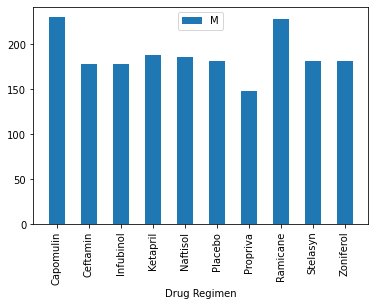

In [49]:
# Generate a bar plot showing the total number of measurements taken 
#on each drug regimen using pyplot.
plt.bar(drug_counts["Drug Regimen"], drug_counts["Measurement Count"], width=0.5)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
#Not sure why "M" is the only part showing up below
plt.legend("Measurement Count", loc='upper center')

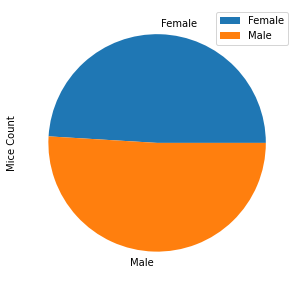

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groups_sex = combined_data.groupby('Sex')
groups_sex_counts = groups_sex.count()
groups_sex_counts.rename(columns={"Mouse ID":"Mice Count"}, inplace=True)
groups_sex_counts
groups_sex_counts.plot.pie(y="Mice Count", figsize=(5,5))

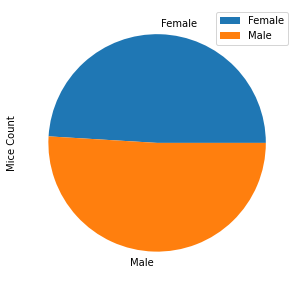

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(groups_sex_counts["Mice Count"], labels=groups_sex_counts.index)
plt.legend(groups_sex_counts.index, loc=1)
plt.ylabel("Mice Count")
fig= plt.gcf()
fig.set_size_inches(5,5)

In [15]:
#Quartiles, Outliers, and Boxplots Section:

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
study_results = combined_data[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Timepoint"]]
study_results.drop(study_results[(study_results["Drug Regimen"] != 'Capomulin') & (study_results["Drug Regimen"] != 'Ramicane') & (study_results["Drug Regimen"] != 'Infubinol') & (study_results["Drug Regimen"] != 'Ceftamin')].index, inplace=True)
study_results
# Start by getting the last (greatest) timepoint for each mouse
study_results_groups = study_results.groupby("Mouse ID")
time_max = study_results_groups.max()
time_max.drop(columns=[("Tumor Volume (mm3)")], inplace=True)
time_max.reset_index(level=0, inplace=True)
time_max
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

study_results_max = pd.merge(study_results, time_max, on=['Mouse ID', 'Timepoint', 'Drug Regimen'], how='right')
study_results_max

C:\Users\Beverly\anaconda3\envs\case_python\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Mouse ID,Tumor Volume (mm3),Drug Regimen,Timepoint
0,k403,22.050126,Ramicane,45
1,s185,23.343598,Capomulin,45
2,x401,28.484033,Capomulin,45
3,m601,28.430964,Capomulin,45
4,g791,29.128472,Ramicane,45
...,...,...,...,...
95,x822,61.386660,Ceftamin,45
96,y163,67.685569,Infubinol,45
97,y769,68.594745,Ceftamin,45
98,y865,64.729837,Ceftamin,45


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#Also added an empty list for stating the potential outliers we found via calculation
tumor_volume_plot = []
potential_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    #What are the volumes for each specific drug?
    drug_vol = study_results_max.loc[study_results_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    #Calculating our quartiles and bounds
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    #Preparing our volume information for the boxplots of each drug, and looking up any outliers
    tumor_per_drug = []
    drug_outliers = []
    for vol in drug_vol:
        tumor_per_drug.append(round(vol,2))
        if vol > upper_bound or vol < lower_bound:
            drug_outliers.append(round(vol,2))
    potential_outliers.append(drug_outliers)
    tumor_volume_plot.append(tumor_per_drug)
    
    print(f"For {drug}, values below {lower_bound} could be outliers.")
    print(f"For {drug}, values above {upper_bound} could be outliers.")
    next
    
#Make this prettier later?
print(f'The potential outliers are in this list:{potential_outliers}.')   
#tumor_volume_plot


For Capomulin, values below 20.7 could be outliers.
For Capomulin, values above 51.83 could be outliers.
For Ramicane, values below 17.91 could be outliers.
For Ramicane, values above 54.31 could be outliers.
For Infubinol, values below 36.83 could be outliers.
For Infubinol, values above 82.74 could be outliers.
For Ceftamin, values below 25.36 could be outliers.
For Ceftamin, values above 87.67 could be outliers.
The potential outliers are in this list:[[], [], [36.32], []].


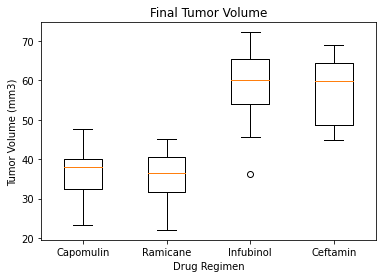

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(drugs)
ax1.boxplot(tumor_volume_plot)
plt.show()

In [ ]:
#Line and Scatter Plots section:

In [16]:
#Dataframes for each drug
#capomulin_df = combined_data[combined_data["Drug Regimen"] == 'Capomulin']
#ceftamin_df = combined_data[combined_data["Drug Regimen"] == 'Ceftamin']
#infubinol_df = combined_data[combined_data["Drug Regimen"] == 'Infubinol']
#ketapril_df = combined_data[combined_data["Drug Regimen"] == 'Ketapril']
#naftisol_df = combined_data[combined_data["Drug Regimen"] == 'Naftisol']
#placebo_df = combined_data[combined_data["Drug Regimen"] == 'Placebo']
#propriva_df = combined_data[combined_data["Drug Regimen"] == 'Propriva']
#ramicane_df = combined_data[combined_data["Drug Regimen"] == 'Ramicane']
#stelasyn_df = combined_data[combined_data["Drug Regimen"] == 'Stelasyn']
#zoniferol_df = combined_data[combined_data["Drug Regimen"] == 'Zoniferol']
#capomulin_df